In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import image
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm as tqdm

import skimage

import brainscore
from brainscore.assemblies import walk_coords,split_assembly
from brainscore.assemblies import split_assembly
from brainscore.metrics import Score

from brainio_base.assemblies import DataAssembly

In [2]:
# stimulus_set[['variation','object_name','category_name','ty','tz','size']].to_csv('../data/dicarlo_images/stimulus_set.csv',index=False)

In [3]:
stim_set = pd.read_csv('/home/elijahc/data/nrb/TrainingDataset_20130430_metadata.txt',sep=' ',names=['path','category_name'])

In [4]:
pnas_categories = [
    'bodies',
    'buildings',
    'flowers',
    'guns',
    'instruments',
    'jewelry',
    'shoes',
    'tools',
    'trees',
]

In [5]:
pnas_stim_set = stim_set[stim_set.category_name.isin(pnas_categories)]

In [6]:
pnas_stim_set

,path,category_name
12800,TrainingDataset_20130430/2779a9221e157b7dd6929...,guns
12801,TrainingDataset_20130430/cbca1e9dec37233701381...,guns
12802,TrainingDataset_20130430/70e1a9c5b52bbcdf3793c...,guns
12803,TrainingDataset_20130430/00efe0814b57b03a52bed...,guns
12804,TrainingDataset_20130430/678f23fe6ca1fc92f0cc7...,guns
12805,TrainingDataset_20130430/172a70ae8722b223e15cc...,guns
12806,TrainingDataset_20130430/c4facc9e7d85f8074c857...,guns
12807,TrainingDataset_20130430/a016677462cc838d82a2e...,guns
12808,TrainingDataset_20130430/68ef3f2c248352aaa0a52...,guns
12809,TrainingDataset_20130430/a0c88b847ab369effc64d...,guns


In [7]:
pnas_stim_set[['path','category_name']].to_csv('../data/nrb_images/train_stimulus_set.csv',index=False)

In [8]:
img_paths = [os.path.join('/home/elijahc/data/nrb',im_path) for im_path in pnas_stim_set['path'].values]
img_paths[3]

'/home/elijahc/data/nrb/TrainingDataset_20130430/00efe0814b57b03a52beddf3cca0ac08e997cc7e.png'

In [9]:
len(img_paths)

57600

In [10]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

In [11]:
def preprocess_img(img,scale=0.5,im_sz=(56,56)):
    pimg = skimage.transform.rescale(img,scale=scale)
    pimg = crop_center(pimg,im_sz[0],im_sz[1])
    return pimg

In [12]:
im = image.imread(img_paths[5])

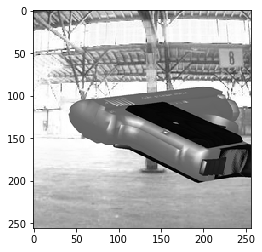

In [13]:
plt.imshow(image.imread(img_paths[5]),cmap='gray')

In [14]:
# medium_imgs = [preprocess_img(image.imread(ipath)[:,:,0],im_sz=(106,106)) for ipath in tqdm(img_paths)]
# medium_imgs = np.stack(medium_imgs)
# np.save('../data/dicarlo_images/med_imgs_106x106',medium_imgs)

/home/elijahc/.pyenv/versions/fastai/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


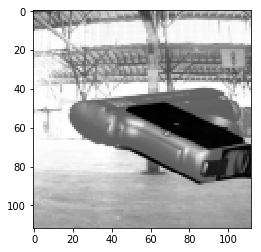

In [15]:
plt.imshow(preprocess_img(im,scale=0.44,im_sz=(112,112)),cmap='gray')

In [16]:
# sm_imgs = np.stack([preprocess_img(image.imread(ipath),scale=0.22,im_sz=(56,56)) for ipath in tqdm(img_paths)])


In [17]:
# np.save('../data/nrb_images/sm_imgs_56x56',sm_imgs)

In [18]:
md_imgs = np.stack([preprocess_img(image.imread(ipath),scale=0.44,im_sz=(112,112)) for ipath in tqdm(img_paths)])


100%|██████████| 57600/57600 [04:30<00:00, 213.02it/s]


In [19]:
np.save('../data/nrb_images/md_imgs_112x112',md_imgs)

NameError: name 'sm_imgs' is not defined

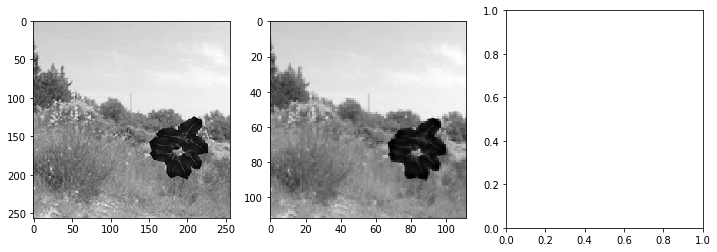

In [20]:
idx = np.random.choice(np.arange(len(img_paths)))
fig,axs = plt.subplots(1,3,figsize=(12,4))

simple_idx = 0

axs[0].imshow(image.imread(img_paths[idx]),cmap='gray')
axs[1].imshow(md_imgs[idx],cmap='gray')
axs[2].imshow(sm_imgs[idx],cmap='gray')

In [ ]:
# stimulus_set.to_parquet('../data/dicarlo_images/stimulus_set.parquet')

In [21]:
shoe_set = pnas_stim_set.query('category_name == "flowers"')
pnas_stim_set.category_name=='shoes'

12800    False
12801    False
12802    False
12803    False
12804    False
12805    False
12806    False
12807    False
12808    False
12809    False
12810    False
12811    False
12812    False
12813    False
12814    False
12815    False
12816    False
12817    False
12818    False
12819    False
12820    False
12821    False
12822    False
12823    False
12824    False
12825    False
12826    False
12827    False
12828    False
12829    False
         ...  
95970    False
95971    False
95972    False
95973    False
95974    False
95975    False
95976    False
95977    False
95978    False
95979    False
95980    False
95981    False
95982    False
95983    False
95984    False
95985    False
95986    False
95987    False
95988    False
95989    False
95990    False
95991    False
95992    False
95993    False
95994    False
95995    False
95996    False
95997    False
95998    False
95999    False
Name: category_name, Length: 57600, dtype: bool

In [22]:
shoe_idxs = (pnas_stim_set.category_name=='flowers').values

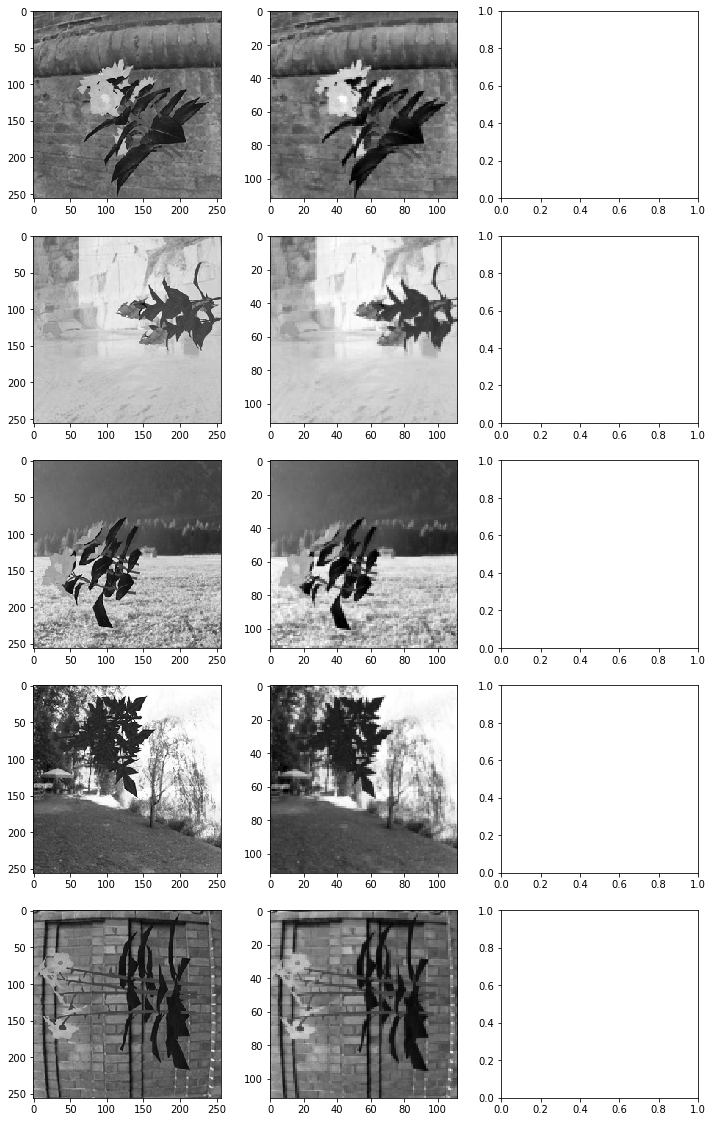

In [23]:
idxs = np.random.choice(np.arange(len(pnas_stim_set))[shoe_idxs],size=5,replace=False)
fig,axs = plt.subplots(5,3,figsize=(12,4*5))

for i,idx in zip(np.arange(5),idxs):
    axes = axs[i]
    axes[0].imshow(image.imread(img_paths[idx]),cmap='gray')
    axes[1].imshow(md_imgs[idx],cmap='gray')